---
title: "Week 5: Linear Regression: Least Squares and Kernel Regression"
author: "Sherry Thomas"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://drive.google.com/file/d/18cIIJNaNvU3nTyXK6ShLQKlU0sdg_Hwv/view?usp=sharing){target="_blank"}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Algorithm
Given a dataset $\{x_{1} ,\dotsc ,x_{n} \}$ where $x_{i} \in \mathbb{R}^{d}$,
let $\{y_{1} ,\dotsc ,y_{n} \}$ be the labels, where $y_{i} \in \mathbb{R}$.
\begin{equation*}
\mathbf{X} =\begin{bmatrix}
-2 & -1 & 1 & 2
\end{bmatrix} \quad \mathbf{y} \ =\ \begin{bmatrix}
-3.9\\
-2.1\\
1.7\\
4.3
\end{bmatrix}
\end{equation*}

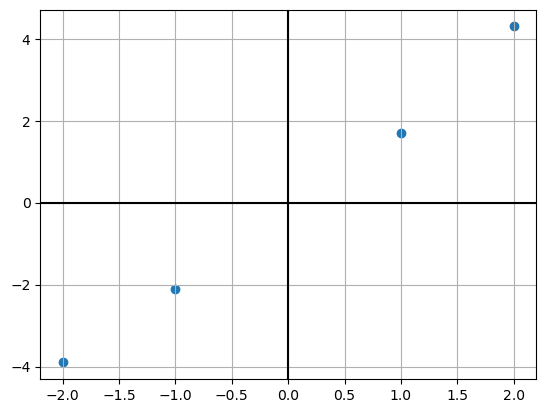

In [ ]:
X = np.array([[-2,-1,1,2]])
y = np.array([[-3.9,-2.1,1.7,4.3]]).T

plt.scatter(X, y)
plt.grid()
plt.axhline(c='k')
plt.axvline(c='k');

## Optimizing the Error Function

The minimization equation can be rewritten in the vectorized form as,
\begin{equation*}
\min_{\mathbf{w} \in \mathbb{R}^{d}}\frac{1}{2} ||\mathbf{X}^{T}\mathbf{w} -\mathbf{y} ||_{2}^{2}
\end{equation*}
Let this be a function of $\mathbf{w}$ and as follows:
\begin{align*}
f(\mathbf{w} ) & =\underset{\mathbf{w} \in \mathbb{R}^{d}}{\min} \frac{1}{2} ||\mathbf{X}^{T}\mathbf{w} -\mathbf{y} ||_{2}^{2}\\
f(\mathbf{w} ) & = \frac{1}{2} (\mathbf{X}^{T}\mathbf{w} -\mathbf{y} )^{T} (\mathbf{X}^{T}\mathbf{w} -\mathbf{y} )\\
\therefore \triangledown f(\mathbf{w} ) & =(\mathbf{XX}^{T} )\mathbf{w} -(\mathbf{Xy} )
\end{align*}
Setting the above equation to zero, we get
\begin{align*}
(\mathbf{XX}^{T} )\mathbf{w} -(\mathbf{Xy} ) & =0\\
(\mathbf{XX}^{T} )\mathbf{w}^{*} & =\mathbf{Xy}\\
\therefore \mathbf{w}^{*} & =(\mathbf{XX}^{T} )^{+}\mathbf{Xy}
\end{align*}
where $(\mathbf{XX}^{T} )^{+}$ is the pseudo-inverse of $\mathbf{XX}^{T}$.

In [ ]:
X = np.vstack((np.array([[1,1,1,1]]),X))
X

array([[ 1,  1,  1,  1],
       [-2, -1,  1,  2]])

In [ ]:
w = np.linalg.pinv(X@X.T)@X@y
w

array([[0.  ],
       [2.02]])

## Using Gradient Descent

As we know $w^*$ is the solution of an unconstrained optimization problem, we can solve it using gradient descent. It is given by,
\begin{align*}
w^{t+1} &= w^t - \eta^t \bigtriangledown f(w^t) \\
\therefore w^{t+1} &= w^t - \eta^t \left [ (XX^T)w^t - (Xy) \right ]
\end{align*}
where $\eta$ is a scalar used to control the step-size of the descent and $t$ is the current iteration.

In [ ]:
eta = 1e-1
w_grad = np.zeros((X.shape[0], 1))
epochs = 1

for i in range(epochs):
    w_grad = w_grad - eta*((X@X.T)@w_grad - X@y)
    print(w_grad)

[[0.  ]
 [2.02]]


In [ ]:
y_pred = w_grad.T@X

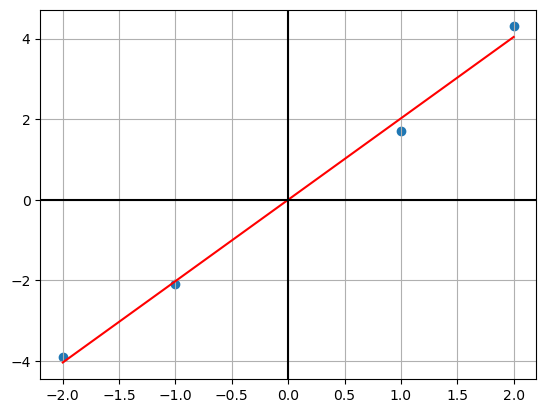

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred.T, c='r')
plt.grid()
plt.axhline(c='k')
plt.axvline(c='k');

## Kernel Regression Algorithm

Given a dataset $\{x_{1} ,\dotsc ,x_{n} \}$ where $x_{i} \in \mathbb{R}^{d}$,
let $\{y_{1} ,\dotsc ,y_{n} \}$ be the labels, where $y_{i} \in \mathbb{R}$.
\begin{equation*}
\mathbf{X} =\begin{bmatrix}
1 & 2 & -1 & -2
\end{bmatrix} \quad \mathbf{y} \ =\ \begin{bmatrix}
1\\
3.9\\
0.9\\
4.1
\end{bmatrix}
\end{equation*}

In [ ]:
X = np.array([[1,2,-1,-2]])
y = np.array([[1,3.9,0.9,4.1]]).T
X = np.vstack((np.array([[1,1,1,1]]),X))

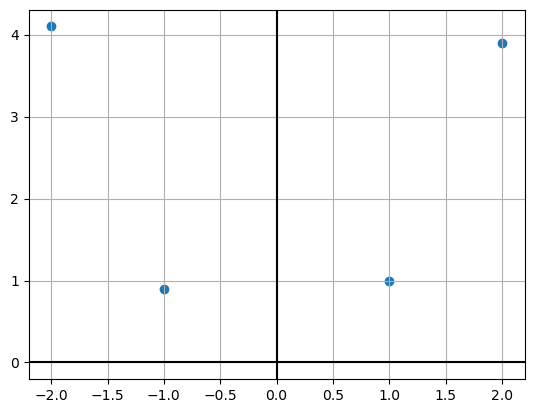

In [ ]:
plt.scatter(X[1], y)
plt.grid()
plt.axhline(c='k')
plt.axvline(c='k');

## Using Kernel Regression

Let's use the polynomial kernel of degree of two. By applying the kernel function  to the dataset, we obtain,
\begin{aligned}
\mathbf{K} & =\left(\mathbf{X}^{T}\mathbf{X} +1\right)^{2}
\end{aligned}

In [ ]:
K = (X.T@X+1)**2
K

array([[ 9, 16,  1,  0],
       [16, 36,  0,  4],
       [ 1,  0,  9, 16],
       [ 0,  4, 16, 36]])

Let $\mathbf{w}^{*} =\mathbf{X\alpha }^{*}$ for some $\mathbf{\alpha }^{*} \in \mathbb{R}^{n}$.
\begin{align*}
\mathbf{\alpha }^{*} =\mathbf{K}^{-1}\mathbf{y}
\end{align*}

In [ ]:
alp = np.linalg.pinv(K)@y
alp

array([[-0.18130556],
       [ 0.17072222],
       [-0.17980556],
       [ 0.17372222]])

Let $X_{test} \in R^{d \times m}$ be the test dataset. We predict by,
\begin{align*}
w^*\phi(X_{test}) &=  \sum _{i=1} ^n \alpha_i^* k(x_i, x_{test_i})
\end{align*}
where $\alpha_i^*$ gives the importance of the $i^{th}$ datapoint towards $w^*$ and $k(x_i, x_{test_i})$ shows how similar $x_{test_i}$ is to $x_i$.

In [ ]:
y_pred = K.T@alp
y_pred

array([[0.92],
       [3.94],
       [0.98],
       [4.06]])

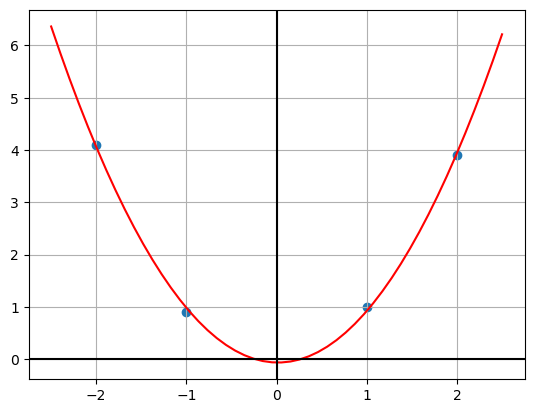

In [ ]:
X_test = np.linspace(-2.5, 2.5).reshape((1,-1))
X_test = np.vstack((np.ones((1,50)),X_test))
K_test = (X.T@X_test+1)**2
y_test = K_test.T@alp

plt.scatter(X[1], y)
plt.plot(np.linspace(-2.5, 2.5).reshape((-1,1)), y_test, c='r')
plt.grid()
plt.axhline(c='k')
plt.axvline(c='k');